# Laboratorio 05: Cálculo Numérico.

---
### Profesor: Daniel Ruiz Mejía
### Nombre: Laura Sofía Sierra Sánchez
*Métodos computacionales 2025-I*

---

In [13]:
# Librerías
import numpy as np
import pandas as pd
from scipy.interpolate import CubicSpline, interp1d
from scipy.integrate import simpson, trapezoid, quad, dblquad
import matplotlib.pyplot as plt

# 1.

En un cirtcuito con un voltaje de  $\varepsilon(t)$ y una inductancia de $L$, la primera ley de Kirchhoff nos da la siguiente relación

$$
\varepsilon(t) = L\frac{\mathrm{d}i}{\mathrm{d}t} + Ri
$$

donde $R$, es la resistencia del ciruito, $I$ es la corriente. Suponga que medimos la corriente con varios valores de $t$ y obtenemos:

```
t = np.array([1.00, 1.01, 1.02, 1.03, 1.04])  # tiempo
i = np.array([3.10, 3.12, 3.14, 3.18, 3.24])  # corriente
```


donde $t$ se mide en segundos, $I$ se da en Amperios, la inductancia $L= 0.98$ H y la resistencia es de 0.142 $\Omega$. Aproxime el votaje  $\varepsilon(t)$ en los valores t=1.00, 1.01, 1.02, 1.03, 1.04 ,  para ello realice lo siguiente:


- Construya un data frame de pandas con los valores de tiempo y corriente
- Emplee el metodo de diferencias finitas y de tres puntos para calcular la derivada numérica.
- Ahora, encuentre un polinomio de interpolación usando alguno de los métodos vistos y calcule la derivada 'exacta'. Compare sus resultados.

In [14]:
# Datos proporcionados
t = np.array([1.00, 1.01, 1.02, 1.03, 1.04])  # tiempo (s)
i = np.array([3.10, 3.12, 3.14, 3.18, 3.24])  # corriente (A)

# Parámetros del circuito
L = 0.98  
R = 0.142

# DataFrame
df = pd.DataFrame({'Tiempo (s)': t, 'Corriente (A)': i})

# Método de diferencias finitas
def derivada_tres_puntos(t, i):
    n = len(t)
    di_dt = np.zeros_like(t)
    di_dt[0] = (-3*i[0] + 4*i[1] - i[2]) / (t[2] - t[0])
    for j in range(1, n-1):
        di_dt[j] = (i[j+1] - i[j-1]) / (t[j+1] - t[j-1])
    di_dt[-1] = (3*i[-1] - 4*i[-2] + i[-3]) / (t[-1] - t[-3])
    return di_dt

di_dt_finitas = derivada_tres_puntos(t, i)
epsilon_finitas = L * di_dt_finitas + R * i

# Método CubicSpline para derivada "exacta"
cs = CubicSpline(t, i, bc_type='natural')
di_dt_spline = cs(t, 1)  # Evaluar la primera derivada
epsilon_spline = L * di_dt_spline + R * i

# Añadir resultados al DataFrame
df['di/dt (Fin)'] = di_dt_finitas
df['ε(t) (Fin)'] = epsilon_finitas
df['di/dt (Spl)'] = di_dt_spline
df['ε(t) (Spl)'] = epsilon_spline

print(df)

   Tiempo (s)  Corriente (A)  di/dt (Fin)  ε(t) (Fin)  di/dt (Spl)  ε(t) (Spl)
0        1.00           3.10          2.0     2.40020     2.107143     2.50520
1        1.01           3.12          2.0     2.40304     1.785714     2.19304
2        1.02           3.14          3.0     3.38588     2.750000     3.14088
3        1.03           3.18          5.0     5.35156     5.214286     5.56156
4        1.04           3.24          7.0     7.32008     6.392857     6.72508


# 2.
Utilizando los siguientes datos de tiempo y distancia:

```
t = np.array([0, 3, 5, 8, 10, 13])  # Tiempo en s
x = np.array([0, 225, 383, 623, 742, 993])  # Distancia recorrida en m
```

- Determinar la velocidad instantanea para cada uno de los tiempos y distancias mostrados.

- ¿Cuál será la velocidad para $t=12$?




In [5]:
# Datos proporcionados
t = np.array([0, 3, 5, 8, 10, 13])  # tiempo (s)
x = np.array([0, 225, 383, 623, 742, 993])  # distancia (m)

df = pd.DataFrame({'t': t, 'x': x})

# Cálculo de velocidades promedio en cada intervalo
delta_t = np.diff(t)
delta_x = np.diff(x)
velocidades_promedio = delta_x / delta_t

# Velocidad instantánea
v_instantanea = np.zeros_like(x, dtype=float)
v_instantanea[0] = velocidades_promedio[0]  # Primer punto
v_instantanea[-1] = velocidades_promedio[-1]  # Último punto

# Puntos intermedios
for i in range(1, len(t)-1):
    v_instantanea[i] = (velocidades_promedio[i-1] + velocidades_promedio[i]) / 2

df["velocidad_aprox"] = v_instantanea

# Velocidad en t = 12 (interpolación lineal entre t=10 y t=13)
v_10 = v_instantanea[-2]  
v_13 = v_instantanea[-1] 
v_12 = v_10 + (v_13 - v_10) * (12 - 10) / (13 - 10)

# Resultados
print(df)

print(f"\nVelocidad en t = 12 s: {v_12:.3f} m/s")

    t    x  velocidad_aprox
0   0    0        75.000000
1   3  225        77.000000
2   5  383        79.500000
3   8  623        69.750000
4  10  742        71.583333
5  13  993        83.666667

Velocidad en t = 12 s: 79.639 m/s


# 3.
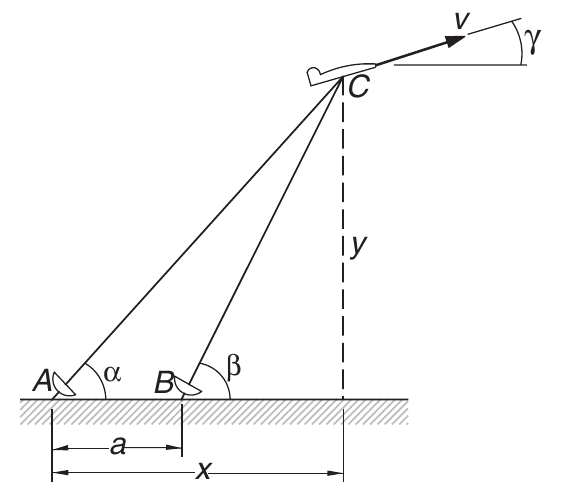


Las estaciones de radar $A$ y $B$, separadas por una distancia $a = 500 \, \text{m}$, rastrean un avión $C$ registrando los ángulos $\alpha$ y $\beta$ en intervalos de 1 segundo. Tres lecturas sucesivas son


```
data = {
    't (s)': [9, 10, 11],
    'alpha (°)': [54.80, 54.06, 53.34],
    'beta (°)': [65.59, 64.59, 63.62]
}

df = pd.DataFrame(data)
```

Calcular la velocidad $v$ del avión y el ángulo de ascenso $\gamma$ en $t = 10 \, \text{s}$. Las coordenadas del avión pueden expresarse como:

$$
x = a \frac{\tan \beta}{\tan \beta - \tan \alpha}
$$

$$
y = a \frac{\tan \alpha \tan \beta}{\tan \beta - \tan \alpha}
$$

In [6]:
# Datos
data = {
    't (s)': [9, 10, 11],
    'alpha (°)': [54.80, 54.06, 53.34],
    'beta (°)': [65.59, 64.59, 63.62]
}

df = pd.DataFrame(data)

a = 500  # Distancia (m)

# Función para calcular coordenadas (x, y) del avión
def calcular_coordenadas(alpha_, beta_, a):
    '''
    Calcula las coordenadas del avión mediante cálculos matemáticos.
    Entradas:
    - alpha_ : ángulo de inclinación desde la estación de radar A (grados).
    - beta_ : ángulo de inclinación desde la estación de rabar B (grados).
    - a : distancia entra las estaciones de radar (m).

    Retorna:
    - x, y : coordenadas del avión
    ''' 
    
    alpha = np.radians(alpha_)
    beta = np.radians(beta_)
    
    tan_alpha = np.tan(alpha)
    tan_beta = np.tan(beta)
    
    denominador = tan_beta - tan_alpha
    
    x = a * (tan_beta / denominador)
    y = a * ((tan_alpha * tan_beta) / denominador)
    
    return x, y

# Calcular coordenadas para los tres tiempos
coordenadas = []
for i in range(3):
    alpha = df['alpha (°)'].iloc[i]
    beta = df['beta (°)'].iloc[i]
    x, y = calcular_coordenadas(alpha, beta, a)
    coordenadas.append((x, y))

# Calcular velocidades (derivada numérica central para t = 10s)
x9, y9 = coordenadas[0] # t = 9s
x10, y10 = coordenadas[1] # t = 10s
x11, y11 = coordenadas[2] # t = 11s

# Velocidad en x y y (promedio de diferencias)
vx = (x11 - x9) / 2 
vy = (y11 - y9) / 2

# Velocidad total
v = np.sqrt(vx**2 + vy**2)

# Ángulo de ascenso
gamma = np.degrees(np.arctan2(vy, vx))

# Resultados

print(f"Velocidad del avión en t = 10s: {v:.2f} m/s")
print(f"Ángulo de ascenso γ en t = 10s: {gamma:.2f}°")

Velocidad del avión en t = 10s: 50.10 m/s
Ángulo de ascenso γ en t = 10s: 15.14°


# 4.
Se proporcionan los siguientes datos para la velocidad de un objeto en función del tiempo:

```
# Datos de tiempo y velocidad
t = np.array([0, 4, 8, 12, 16, 20, 24, 28, 32, 36])  # segundos
v = np.array([0, 34.7, 61.8, 82.8, 99.2, 112.0, 121.9, 129.7, 135.7, 140.4])  # m/s
```
- ¿Qué tan lejos viaja el objeto desde $t = 0$ hasta 28 s?
- ¿Cuál es la aceleración del objeto a $t = 28$ s?

In [7]:
# Datos
t = np.array([0, 4, 8, 12, 16, 20, 24, 28, 32, 36])  
v = np.array([0, 34.7, 61.8, 82.8, 99.2, 112.0, 121.9, 129.7, 135.7, 140.4])

# Seleccionar los datos hasta t = 28 s
datos = t <= 28
t_sub = t[datos]
v_sub = v[datos]

# Integración numérica par hallar el área bajo la curva (distancia recorrida)
distancia = simpson(y=v_sub, x=t_sub)
print(f"Distancia recorrida entre t=0 y t=28 s: {distancia:.4f} m")

i_28 = 7  # Índice donde t=28

if i_28 > 0 and i_28 < len(t)-1:
    # Diferencia centrada
    h = t[i_28+1] - t[i_28-1]
    aceleracion = (v[i_28+1] - v[i_28-1]) / h
else:
    # Diferencia hacia atrás
    aceleracion = (v[i_28] - v[i_28-1]) / (t[i_28] - t[i_28-1])

print(f"Aceleración en t = 28 s: {aceleracion:.4f} m/s²")

Distancia recorrida entre t=0 y t=28 s: 2319.7667 m
Aceleración en t = 28 s: 1.7250 m/s²


# 5.

El área superficial horizontal $A_s$ ($m^2$) de un lago a una profundidad particular puede calcularse a partir del volumen por diferenciación:

$$A_s(z) = -\frac{dV(z)}{dz}$$

donde:
- $V$ = volumen ($m^3$)
- $z$ = profundidad ($m$) medida desde la superficie hacia el fondo


La concentración promedio de una sustancia que varía con la profundidad $c$ ($g/m^3$) puede calcularse por integración:

$$c = \frac{\int_0^Z c(z)A_s(z) dz}{V_T}$$

donde:
- $Z$ = profundidad total (m)
- $V_T$ = volumen total del lago, dado también por:


$$V_T = \int_0^Z A_s(z) dz$$
Con base en los siguientes datos, determine la concentración promedio.
```
# Datos proporcionados
z = np.array([0, 4, 8, 12, 16])  # profundidad en metros
V = np.array([9.8175, 5.1051, 1.9635, 0.3927, 0.0000]) * 1e6  # volumen en m³
c = np.array([10.2, 8.5, 7.4, 5.2, 4.1])  # concentración en g/m³

# Parámetros importantes
Z = z[-1]  # profundidad total (16 m)
```

In [8]:
# Datos
z = np.array([0, 4, 8, 12, 16]) # profundidad (m)                   
V = np.array([9.8175, 5.1051, 1.9635, 0.3927, 0.0000]) * 1e6 # volumen (m^3)
c = np.array([10.2, 8.5, 7.4, 5.2, 4.1]) # concentración (g/m^3)         

# Calcular área superficial (derivada)
As = -np.gradient(V, z)

# Numerador (concentración promedio)
numerador = simpson(y=c * As, x=z)

# Volumen total (denominador)
V_T = simpson(y=As, x=z)

# Concentración promedio
c_promedio = numerador / V_T

# Resultados
print(f"Concentración promedio: {c_promedio:.4f} g/m³")
print(f"Volumen total del lago: {V_T} m³")

Concentración promedio: 8.0973 g/m³
Volumen total del lago: 9817500.0 m³


# 6.
La función de onda del electrón en estado 2s ($n=2$, $l=0$, $m=0$) en unidades radiales adimensionales es:

$$\psi_{200}(r,\theta,\varphi) = \frac{1}{4\sqrt{2\pi}} (2 - r) e^{-r/2}$$

La probabilidad de encontrar el electrón entre $r=0$ y $r=R$ está dada por:

$$P(R) = \frac{1}{8} \int_0^R r^2 (2 - r)^2 e^{-r} dr$$

donde las integrales angulares contribuyen un factor de $4\pi$.

- Calcule las probabilidades $P(R)$ para $R \in [10,25]$ con incrementos de 1 utilizando los métodos:
    - Trapezoidal
    - Simpson
    - Cuadratura
    
Garantizando que el error sea menor a $\varepsilon = 10^{-6}$
- Calcule la integral radial desde $r=0$ hasta $+\infty$, verifique que la probabilidad total sea 1.



In [9]:
# Tolerancia
eps = 1e-6

# Definir la función integrando
def integrando(r):
    return r**2 * (2 - r)**2 * np.exp(-r)

# Intervalo [10, 25]
R_values = np.arange(10, 26)

# Guardar resultados
trapezoidal_r = []
simpson_r = []
cuadratura_r = []

for R in R_values:
    # Puntos para métodos compuestos
    r_valores = np.linspace(0, R, 1001)
    f_valores = integrando(r_valores)

    # Trapezoidal
    P_trap = (1/8) * trapezoid(f_valores, r_valores)
    trapezoidal_r.append(P_trap)

    # Simpson
    P_simp = (1/8) * simpson(y=f_valores, x=r_valores)
    simpson_r.append(P_simp)

    # Cuadratura de Gauss (quad)
    P_quad, error = quad(lambda r: (1/8) * integrando(r), 0, R, epsabs=eps)
    cuadratura_r.append(P_quad)

# DataFrame de resultados
df = pd.DataFrame({
    'R': R_values,
    'P_trap': trapezoidal_r,
    'P_simp': simpson_r,
    'P_quad': cuadratura_r
})

# Mostrar resultados
print(df)

# Verificación probabilidad total hasta infinito
P_total, error_total = quad(lambda r: (1/8) * integrando(r), 0, np.inf, epsabs=eps)
print(f"\nProbabilidad total = {P_total:.4f}") 
print(f"Error estimado = {error_total:.1e}")

     R    P_trap    P_simp    P_quad
0   10  0.940481  0.940481  0.940481
1   11  0.968223  0.968223  0.968223
2   12  0.983552  0.983552  0.983552
3   13  0.991708  0.991708  0.991708
4   14  0.995913  0.995913  0.995913
5   15  0.998025  0.998025  0.998025
6   16  0.999062  0.999062  0.999062
7   17  0.999561  0.999561  0.999561
8   18  0.999797  0.999797  0.999797
9   19  0.999908  0.999908  0.999908
10  20  0.999958  0.999958  0.999958
11  21  0.999981  0.999981  0.999981
12  22  0.999992  0.999992  0.999992
13  23  0.999996  0.999996  0.999996
14  24  0.999998  0.999998  0.999998
15  25  0.999999  0.999999  0.999999

Probabilidad total = 1.0000
Error estimado = 1.4e-09


# 7.
Una lámina cuadrada uniforme de metal flota inmóvil en el espacio:

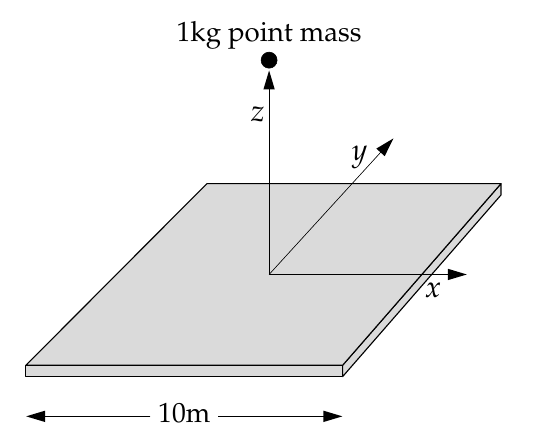

La lámina cuadrada tiene 10 m de lado y espesor despreciable. La componente de la fuerza gravitacional a lo largo del eje $z$ sobre una masa de prueba de 1 kg ubicada a distancia $z$ del centro de la lámina es:

$$F_z = G\sigma z \iint_{-L/2}^{L/2} \frac{dx \, dy}{(x^2 + y^2 + z^2)^{3/2}}$$

donde $G = 6.674 \times 10^{-11} \, \text{m}^3 \, \text{kg}^{-1} \, \text{s}^{-2}$, $\sigma = \frac{M}{L^2}$, $L = 10$ m y $M = 10,000$ kg.

- Calcular numéricamente esta integral doble.
- Graficar $F_z$ como función de $z$ desde $z=0$ hasta $z=10$ m


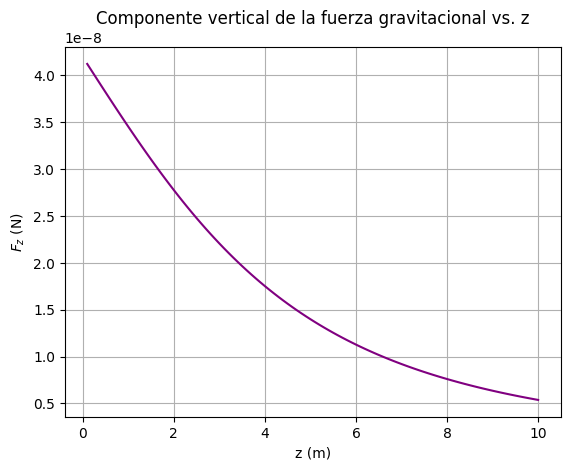

In [15]:
# Constantes
G = 6.674e-11                
L = 10.0                    
M = 10000         
sigma = M / (L**2)           

# Límite de integración en x e y
a1, b1 = -L/2, L/2
a2, b2 = -L/2, L/2

# Función integrando
def integrando(y, x, z):
    return 1.0 / (x**2 + y**2 + z**2)**(3/2)

# Función para Fz(z)
def Fz(z):
    f = lambda y, x: integrando(y, x, z)
    g = lambda x: a2
    h = lambda x: b2
    integral, _ = dblquad(f, a1, b1, g, h)
    return G * sigma * z * integral

# Rango de z
z_valores = np.linspace(0.1, 10, 100) # sin z = 0 para evitar divergencia en la integral
Fz_values = [Fz(z) for z in z_valores]

# Graficar
plt.plot(z_values, Fz_values, color='purple')
plt.xlabel("z (m)")
plt.ylabel(r"$F_z$ (N)")
plt.title("Componente vertical de la fuerza gravitacional vs. z")
plt.grid()
plt.show()